In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations. (zip function groups lats and lngs as pairs)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# unzip lats and lngs into list.
coordinates

[(74.87692250766258, 114.90071010953233),
 (-73.0987377574694, 19.437464384988772),
 (-26.46065010717693, 45.363979253314255),
 (1.724275594729221, 162.89755578495925),
 (-13.23501290723621, 105.31425822989502),
 (68.40459430755155, -76.98759410145871),
 (27.266508689279704, 20.850077556818462),
 (74.90562715978774, 122.14227429916338),
 (15.151676244649877, 172.69062251097222),
 (-69.66146596695941, -62.65948415332433),
 (-80.65632344089946, -138.44963594530572),
 (-46.910971335225376, -159.63957046834307),
 (42.667021694658246, -155.12770350118123),
 (33.884761390429645, -25.308739928969544),
 (-5.630552696413602, 103.84310061864056),
 (16.30818169371436, 36.76788007765458),
 (-49.00253335499381, 4.587457545040536),
 (15.750260212826333, 20.036560497099487),
 (-21.65830568566321, -170.6662135272728),
 (15.701262532843572, -23.319632788305853),
 (-75.30433541548857, 116.87564723556227),
 (19.170766325803015, -73.2837355567862),
 (-0.09710312155203837, 120.47956281555065),
 (-42.024431

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
import sys
sys.path.append("C:/Users/c_tal/Desktop")
from api_keys import weather_api_key
api_key = weather_api_key

In [ ]:
import requests
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
 # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | awjilah
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | pringsewu
Processing Record 15 of Set 1 | wagar
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | biltine
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | vila do maio
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | saint-marc
Processing Record

KeyboardInterrupt: 

In [26]:
# check number of cities in city_data dictionary array
len(city_data)

551

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-22 02:16:16,42.6001,-73.9662,32.59,81,100,1.99
1,Cochrane,CA,2021-12-22 02:11:22,51.1834,-114.4687,21.38,83,100,6.08
2,Jamestown,US,2021-12-22 02:12:23,42.0970,-79.2353,37.51,70,1,5.01
3,Hasaki,JP,2021-12-22 02:16:17,35.7333,140.8333,55.29,57,99,10.51
4,Bowen,AU,2021-12-22 02:16:17,-20.0167,148.2333,83.19,62,5,12.12
...,...,...,...,...,...,...,...,...,...
546,Padang,ID,2021-12-22 02:30:09,-0.9492,100.3543,84.25,72,34,4.14
547,Dickinson,US,2021-12-22 02:30:10,29.4608,-95.0513,56.95,80,20,1.01
548,Westport,US,2021-12-22 02:30:10,41.1415,-73.3579,41.92,74,90,4.00
549,Mecca,SA,2021-12-22 02:30:02,21.4267,39.8261,66.47,40,0,5.14


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

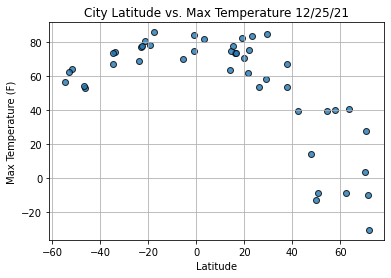

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

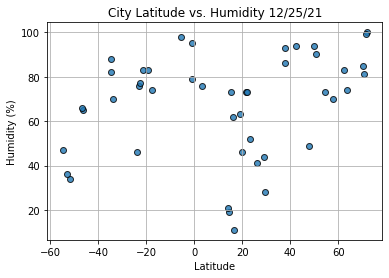

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

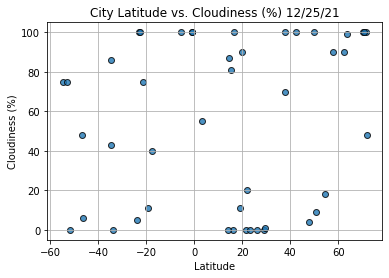

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()